### Introdução - aproximação de Stirling: ###
A distribuição de Poisson é dada por:

$ Poisson(k | \lambda) = \frac{e^{-\lambda}\lambda^{k}}{k!}$, k $\epsilon$ {0, 1, 2, ...}

Para um $\lambda$ grande, a distribuição, nas redondezas de $k\approx\lambda$, pode ser aproximada por uma Normal com $\mu=\lambda$ e $\sigma=\lambda$:

$\frac{e^{-\lambda}\lambda^{k}}{k!}\approx\frac{1}{\sqrt{2\pi\lambda}}e^{\frac{-(k-\lambda)^2}{2\lambda}}$

Utilizando $k=\lambda$:

$\frac{e^{-\lambda}\lambda^{\lambda}}{\lambda!}\approx\frac{1}{\sqrt{2\pi\lambda}}$

$\lambda! \approx e^{-\lambda}\lambda^{\lambda}\sqrt{2\pi\lambda}$ **(Aproximação de Stirling)**

Utilizando o log da aproximação:

$\log\lambda! \approx {-\lambda}+ \lambda\log\lambda + \frac{1}{2}\log{2\pi\lambda}$

Essa aproximação possui a "aproximação principal" e a aproximação de baixo peso $\frac{1}{2}\log{2\pi\lambda}$. Para simplificar o cálculo, vamos cortar a aproximação de baixo peso.

A partir dessa aproximação, é possível aproximar o termo $\log\binom{N}{k}$:

$\log\binom{N}{k} \equiv \log\frac{N!}{k!(N-k)!} \equiv \log{N!} - \log{(N-k)!} - \log{k!}$

$\approx N \log{N} - N - (N-k)\log{(N-k)} + (N-k) - k \log{k} + k $

Somando e subtraindo $k\log{N}$

$\approx (N-k)\log{\frac{N}{N-k}} + k\log{\frac{N}{k}} $

Multiplicando e dividindo por N:

$\approx N \left [ \frac{N-k}{N}\log{\frac{N}{N-k}} + \frac{k}{N}\log{\frac{N}{k}} \right ]$

Utilizando $x=\frac{k}{N}$:

$\approx N \left [ (1-x)\log{\frac{1}{1-x}} + x\log{\frac{1}{x}} \right ]$

Se definirmos a **entropia binária** como:

$H_2(x) = x\log{\frac{1}{x}} + (1-x)\log{\frac{1}{1-x}}$

Podemos reescrever a aproximação do termo $\log\binom{N}{k}$ como:

$\log\binom{N}{k} \approx NH_2(\frac{k}{N})$

Como todos os termos são logaritmicos, é possível reescrever aplicando o log em base 2:

$\binom{N}{k} \approx 2^{NH_2(\frac{k}{N})}$

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

O ponto máximo foi encontrado em: 0.50


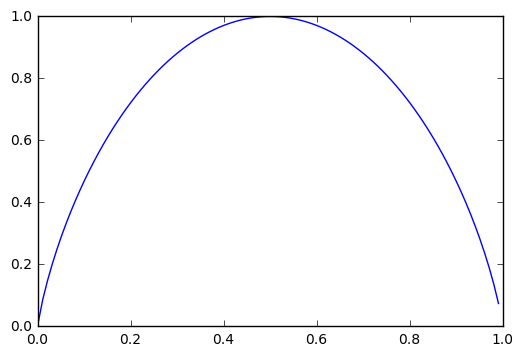

In [126]:
x = np.arange(0.001, 1, 0.01)
def entropy(x):
    return x * np.log2(1/x) + (1-x) * np.log2(1/(1-x))
h = entropy(x)
plt.plot(x,h)
idx_max = np.argmax(h)
print("O ponto máximo foi encontrado em: %.2f" % x[idx_max])

### Noisy Communication Channel ###

Probabilidade de erro de 1 bit: $f$

Probabilidade de erro com 3 bits: todas as combinações onde 2 erros podem acontecer **(distribuição binomial)**.

Probabilidade de erro com N bits: todas as combinações onde $\frac{N+1}{2}$ erros podem acontecer **(distribuição binomial)**.

$E_N = \sum\limits_{n=\frac{N+1}{2}}^N \binom{N}{n} f^n (1-f)^{N-n}$ para N ímpar



Maior termo encontrado na posição 0


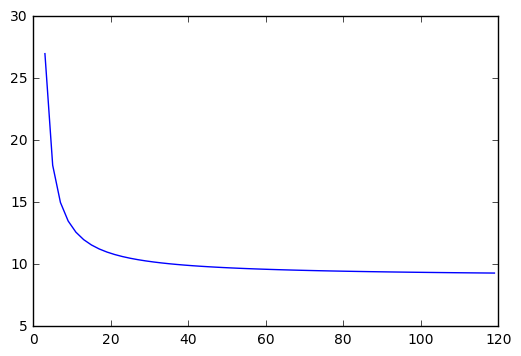

In [127]:
from math import factorial
def entropy(x):
    if x == 1:
        return 1
    return x * np.log2(1/x) + (1-x) * np.log2(1/(1-x))

def error_terms(f=0.1, N=1, mode=''):
    ni = (N+1)//2
    error = []
    for i in range(ni, N+1):
        if mode == 'stirling':
            # Probabilidade de erro com a aproximação de Stirling
            comb = 2**(N*entropy(i/N))
        else:
            # Probabilidade de erro sem a aproximação de Stirling
            comb = factorial(N)/(factorial(i)*factorial(N-i))
        error.append(comb * f**i * (1-f)**(N-i))
    return error

def error_probability(f=0.1, N=1, mode=''):    
    error = error_terms(f,N, mode)
    return np.asarray(error).sum()
        
# Termos da soma do erro
def calculate_error_terms(f=0.1, N=60, mode=''):
    argmaxs = []
    ratio = []
    for n in range(3,N,2):
        e_terms = error_terms(f, n, mode)
        nargmax = np.argmax(e_terms)
        argmaxs.append(nargmax)
        max_term = e_terms[nargmax]
        del e_terms[nargmax]
        nargmax = np.argmax(e_terms)
        max_term2 = e_terms[nargmax]
        ratio.append(max_term/max_term2)
    return ratio, argmaxs

N = 120
ratio, argmaxs = calculate_error_terms(N=N)
print("Maior termo encontrado na posição %d" % np.unique(argmaxs))
fig = plt.figure()
plt.plot(range(3,N,2), ratio)

In [134]:
# Probabilidade de erro sem repetição
f = 0.1
N = 1
print("A probabilidade de erro com f=%.2f sem repetição é de %0.4f" % (f, error_probability(f, N)))

# Probabilidade de erro com repetição
N = 50
print("A probabilidade de erro com f=%.2f e repetição de %d bits é de %0.16f" % (f, N, error_probability(f, N)))
print("A probabilidade de erro com f=%.2f sem repetição utilizando Stirling é de %0.16f" % (
        f, error_probability(f, N, 'stirling')))

# Probabilidade de erro sem repetição
f = 0.4
N = 1
print("A probabilidade de erro com f=%.2f sem repetição é de %0.4f" % (f, error_probability(f, N)))

# Probabilidade de erro com repetição
N = 3
print("A probabilidade de erro com f=%.2f e repetição de %d bits é de %0.4f" % (f, N, error_probability(f, N)))
print("A probabilidade de erro com f=%.2f sem repetição utilizando Stirling é de %0.4f" % (
        f, error_probability(f, N, 'stirling')))

A probabilidade de erro com f=0.10 sem repetição é de 0.1000
A probabilidade de erro com f=0.10 e repetição de 50 bits é de 0.0000000000010150
A probabilidade de erro com f=0.10 sem repetição utilizando Stirling é de 0.0000000000090391
A probabilidade de erro com f=0.40 sem repetição é de 0.4000
A probabilidade de erro com f=0.40 e repetição de 3 bits é de 0.3520
A probabilidade de erro com f=0.40 sem repetição utilizando Stirling é de 1.1600


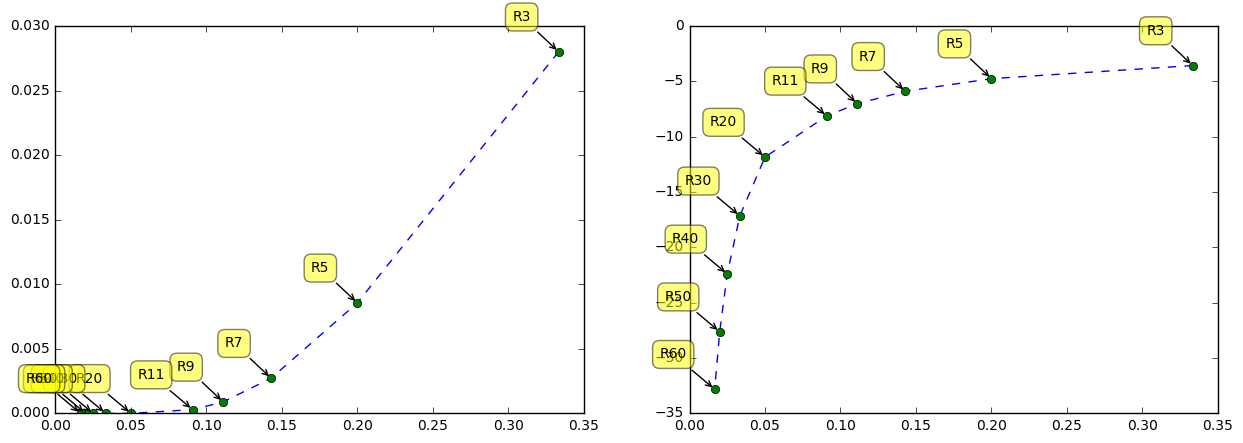

In [86]:
f = 0.1
error_list  = []
rate = []
labels = []
for N in range(3, 13, 2):
    error_list.append(error_probability(f, N))
    rate.append(1/N)
    labels.append("R%d" % N)
    
for N in range(20, 61, 10):
    error_list.append(error_probability(f, N))
    rate.append(1/N)
    labels.append("R%d" % N)
    
fig, (ax, bx) = plt.subplots(1, 2, figsize=(15,5))
ax.plot(rate, error_list, '--')
ax.plot(rate, error_list, 'o')
for label, x, y in zip(labels, rate, error_list):
    ax.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
bx.plot(rate, np.log(error_list), '--',)
bx.plot(rate, np.log(error_list), 'o',)
for label, x, y in zip(labels, rate, error_list):
    bx.annotate(
        label,
        xy=(x, np.log(y)), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

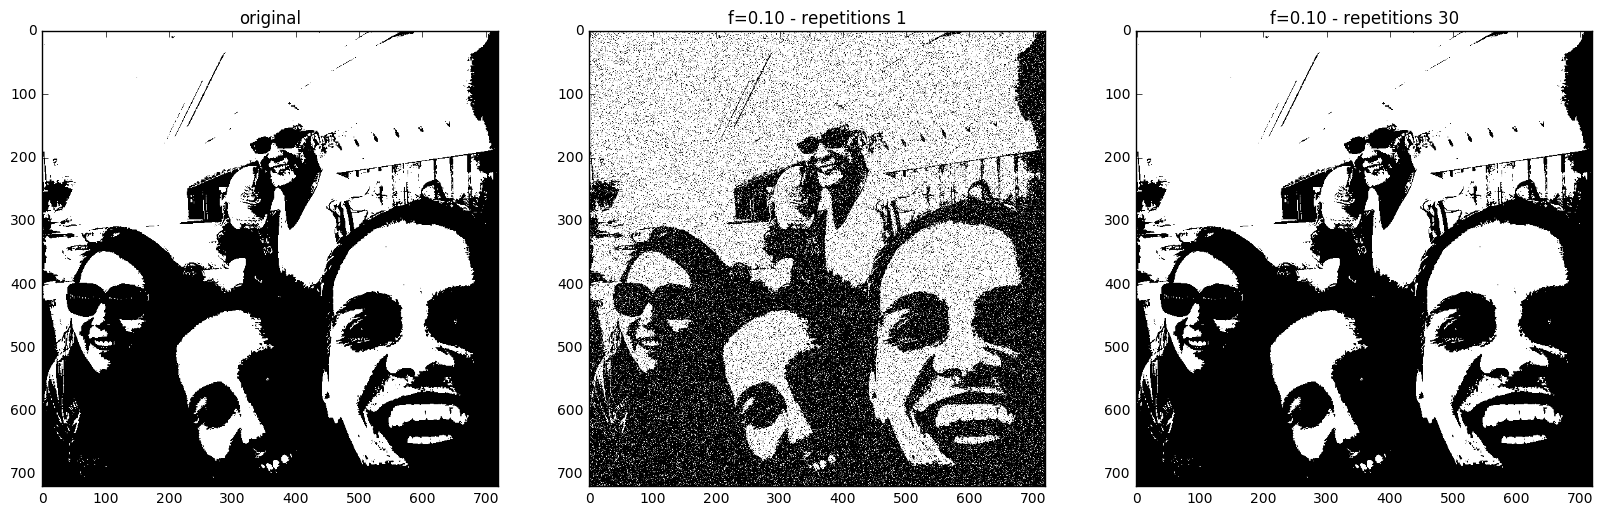

In [35]:
# Carrega imagem em preto e branco
jpgfile = Image.open("picture.jpg").convert('L')
data = jpgfile.point(lambda x: 0 if x<128 else 255, '1')

def encode(data, repetition):
    data_transmited = np.asarray(data, np.uint8) 
    transmission_shape = (data_transmited.shape[0], data_transmited.shape[1]*repetition)
    data_transmited = np.repeat(data_transmited, repetition)
    data_transmited = data_transmited.reshape(transmission_shape[0], transmission_shape[1])
    
    return data_transmited

def decode(data, repetition):
    received_shape = (data.shape[0], data.shape[1]/repetition)
    data_received = np.asarray(data, np.uint8)
    data_received = data_received.reshape(received_shape[0]*received_shape[1], repetition)
    data_received = np.argmax(np.apply_along_axis(np.bincount, 1, data_received, minlength=2), axis=1)
    data_received = data_received.reshape(received_shape)
    data_received = np.asarray(data_received, np.uint8)
    
    return data_received

def send(data, f=0.1, repetition=1):
    
    # Encode transmitted data
    data_transmited = encode(data, repetition)
    
    # Add noise when going through channel
    noise = np.random.choice([0, 1], size=data_transmited.shape, p=[1-f, f])
    data_received = data_transmited ^ noise
    
    # Decode received data
    data_received = decode(data_received, repetition)

    # Convert to image format
    i = Image.fromarray(data_received)
    data_recovered = i.point(lambda x: 0 if not x else 255, '1')
    
    return data_recovered

# Coloca ruído com probabilidade f = 0.1
f = 0.1
n = 30
data1 = send(data, f, 1)
data3 = send(data, f, n)

_, (ax, bx, cx) = plt.subplots(1, 3, figsize=(20,20))
ax.imshow(data)
ax.set_title("original")
bx.imshow(data1)
bx.set_title("f=%.2f - repetitions %d" %(f,1))
cx.imshow(data3)
cx.set_title("f=%.2f - repetitions %d" %(f,n))
plt.show()

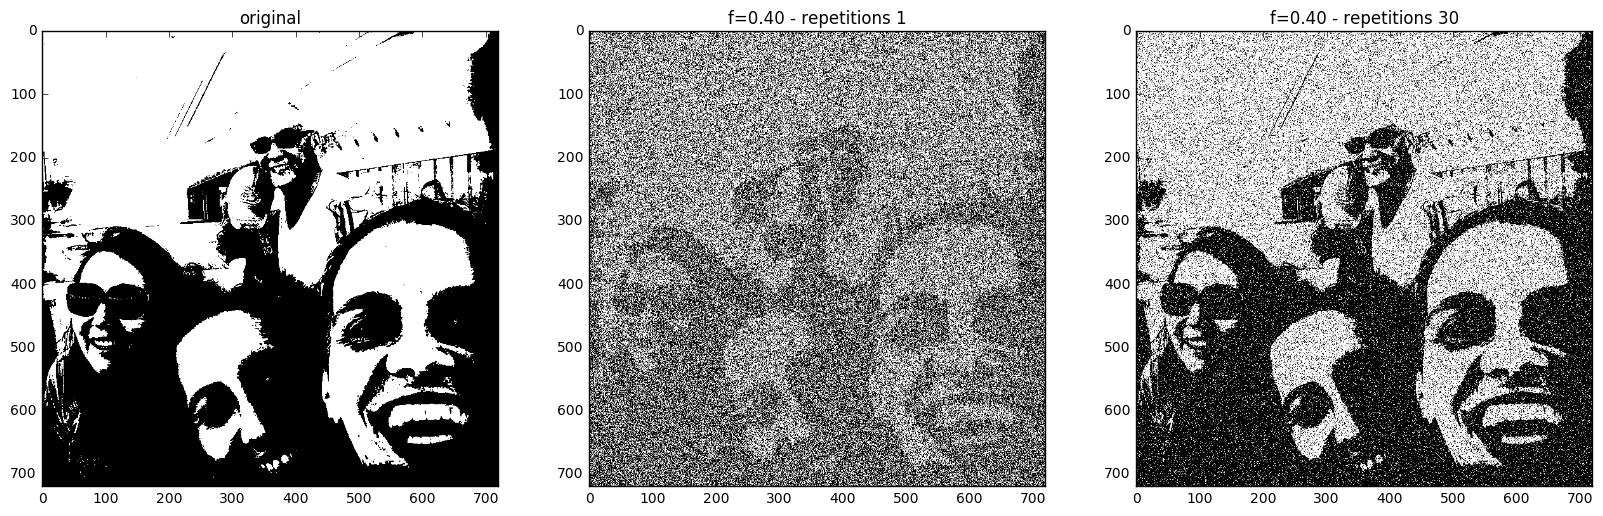

In [44]:
# Coloca ruído com probabilidade f = 0.4
f = 0.4
n = 30
data1 = send(data, f, 1)
data3 = send(data, f, n)

_, (ax, bx, cx) = plt.subplots(1, 3, figsize=(20,20))
ax.imshow(data)
ax.set_title("original")
bx.imshow(data1)
bx.set_title("f=%.2f - repetitions %d" %(f,1))
cx.imshow(data3)
cx.set_title("f=%.2f - repetitions %d" %(f,n))
plt.show()